# Processos estocásticos

No presente trabalho iremos explorar alguns projetos que têm em comum a exploração de processos estocásticos e dinâmicas de sistemas complexos através de simulações de movimento aleatório. As ideias foram fornecidas pelo professor através de uma lista de sugestões.

## Movimento Browniano

Vamos explorar o movimento Browniano de uma partícula sob a ação de um potencial.

Sabemos que o movimento Browniano é descrito pela equação de Langevin ou pela equação de Fokker-Planck. Para simplificar, vamos usar uma aproximação discreta da equação de Langevin.

Já para o potencial, vamos considerar um potencial simples, como o potencial harmônico:
$V(x) = \frac 1 2 kx^2$.

A equação de Langevin discreta em uma dimensão pode ser escrita como:
$x(t+\Delta t)=x(t)-\frac k m  x(t)+\sqrt{2 D \Delta t} . \xi(t)$.

Onde $\Delta t$ é o passo de tempo, $D$ é o coeficiente de difusão, $\xi(t)$ é um número aleatório gaussiano com média zero e variância unitária.

Com base nessas informações, implementei a simulação que permite a visualização do movimento browniano sob a ação de um potencial harmônico:

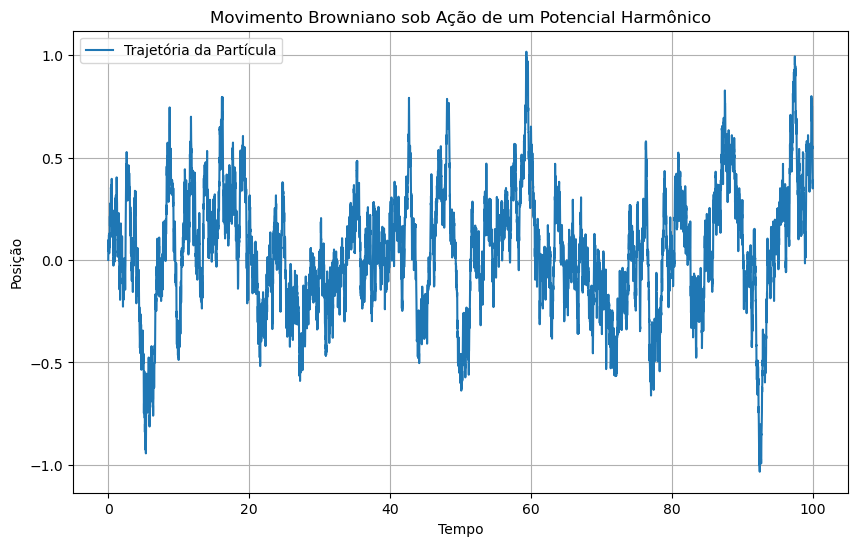

In [1]:
# importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# definindo os parametros
m = 1.0 # massa da particula
k = 1.0 # constante do potencial
D = 0.1 # coeficiente de difusao
x0 = 0.0 # posição inicial
delta_t = 0.01 # passo de tempo
num_passos = 10000 # numero de passos

# inicializando o array de posicao
x = np.zeros(num_passos)
x[0] = x0

# preenchendo array do tempo
t = np.linspace(0, num_passos * delta_t, num_passos)

# simulacao do Movimento Browniano
for i in range(1, num_passos):
    xi = np.random.normal(0, 1) # número aleatório gaussiano
    
    x[i] = x[i-1] - (k/m) * x[i-1] * delta_t + np.sqrt(2*D*delta_t) * xi # atualizacao da posicao

# visualizacao
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Trajetória da Partícula')
plt.title('Movimento Browniano sob Ação de um Potencial Harmônico')
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.grid(True)
plt.legend()
plt.show()

## Caminhante Aleatório

Vamos desenvolver a seguir uma simulação de um caminhante aleatório em 1, 2 e 3 dimensões. Um caminhante aleatório é um modelo simples que descreve um caminho composto de uma sequência de passos aleatórios.

O caminhante aleatório pode ser descrito da seguinte forma:

- 1 Dimensão (D = 1): O caminhante se move para a esquerda ou direita em cada passo com igual probabilidade;
- 2 Dimensões (D = 2): O caminhante se move em um plano, podendo ir para norte, sul, leste ou oeste com igual probabilidade;
- 3 Dimensões (D = 3): O caminhante se move em um espaço tridimensional, podendo ir para cima, baixo, norte, sul, leste ou oeste com igual probabilidade.

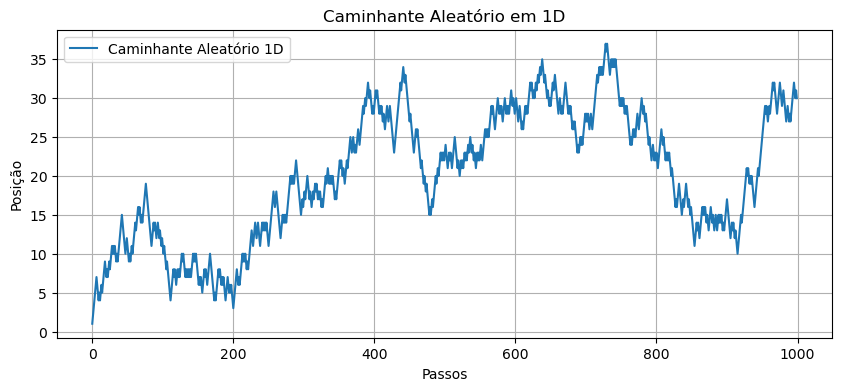

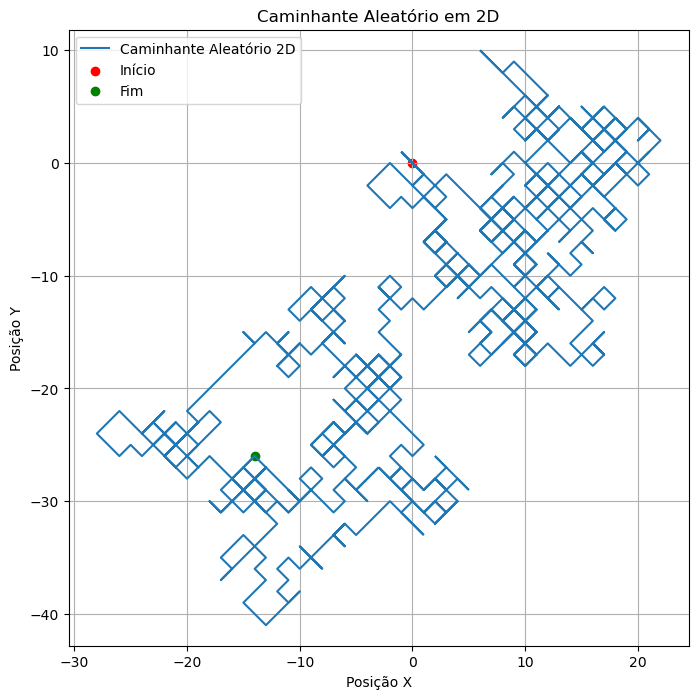

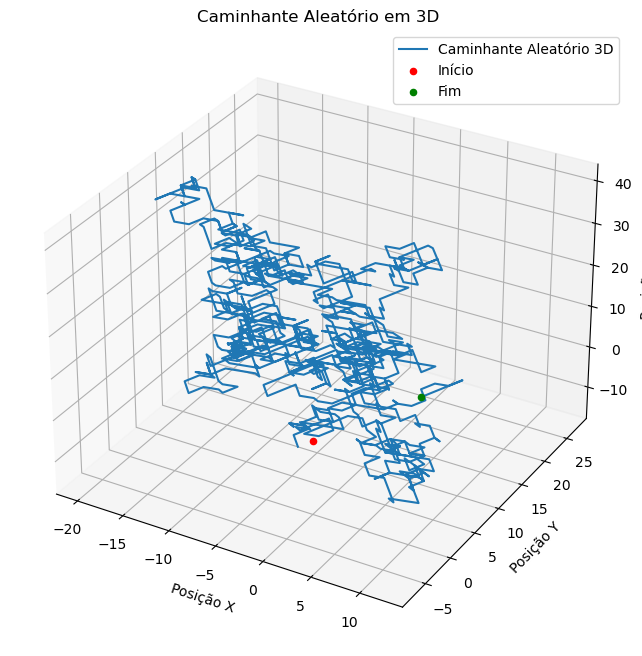

In [2]:
# importanto as bibliotecas usadas
from mpl_toolkits.mplot3d import Axes3D

# definindo as funcoes que retornam posicao depois de n passos dados
def caminha_aleatorio_1d(num_steps): # so pode andar para esquerda ou para direita
    steps = np.random.choice([-1, 1], size=num_steps) # gera passos aleatorios em 1D
    position = np.cumsum(steps) # calcula a soma cumulativa para determinar a posicao.
    return position

def caminha_aleatorio_2d(num_steps): # pode andar em um plano, para norte, sul, leste ou oeste
    steps = np.random.choice([-1, 1], size=(num_steps, 2)) # gera passos aleatorios em 2D
    position = np.cumsum(steps, axis=0)
    return position

def caminha_aleatorio_3d(num_steps): # pode andar em um espaço tridimensional, podendo ir para cima, baixo, norte, sul, leste ou oeste 
    steps = np.random.choice([-1, 1], size=(num_steps, 3)) # gera passos aleatorios em 3D
    position = np.cumsum(steps, axis=0)
    return position

# parametros da simulacao
num_passos = 1000

# simulacao em 1D
position_1d = caminha_aleatorio_1d(num_passos)

# visualizacao em 1D
plt.figure(figsize = (10, 4))
plt.plot(position_1d, label='Caminhante Aleatório 1D')
plt.title('Caminhante Aleatório em 1D')
plt.xlabel('Passos')
plt.ylabel('Posição')
plt.grid(True)
plt.legend()
plt.show()

# simulacao em 2D
position_2d = caminha_aleatorio_2d(num_passos)

# visualizacao em 2D
plt.figure(figsize = (8, 8))
plt.plot(position_2d[:, 0], position_2d[:, 1], label = 'Caminhante Aleatório 2D')
plt.scatter(0, 0, color = 'red', label = 'Início')
plt.scatter(position_2d[-1, 0], position_2d[-1, 1], color = 'green', label = 'Fim')
plt.title('Caminhante Aleatório em 2D')
plt.xlabel('Posição X')
plt.ylabel('Posição Y')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

# simulacao em 3D
position_3d = caminha_aleatorio_3d(num_passos)

# visualizacao em 3D
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.plot(position_3d[:, 0], position_3d[:, 1], position_3d[:, 2], label = 'Caminhante Aleatório 3D')
ax.scatter(0, 0, 0, color = 'red', label = 'Início')
ax.scatter(position_3d[-1, 0], position_3d[-1, 1], position_3d[-1, 2], color = 'green', label = 'Fim')
ax.set_title('Caminhante Aleatório em 3D')
ax.set_xlabel('Posição X')
ax.set_ylabel('Posição Y')
ax.set_zlabel('Posição Z')
ax.legend()
plt.show()

## Problema de Kramers

O problema de Kramers é um conceito fundamental em cinética química e física estatística, relacionado à taxa de escape de partículas sobre uma barreira de potencial sob a influência de ruído térmico. É intimamente ligado à lei de Arrhenius, que descreve a dependência da taxa de reação com a temperatura.

Para desenvolvermos uma simulação do problema, precisamos entender alguns conceitos relacionados:

- Barreira de Potencial: O problema envolve uma partícula que se move em um potencial com uma barreira, como $V(x) = \frac k 2 (x^2 - x0^2)^2$, onde $x0$ é a posição da barreira;
- Taxa de Escape: Kramers calculou a taxa à qual uma partícula supera essa barreira devido à agitação térmica;
- Equação de Kramers: A taxa de escape $k$ é dada por $k = A.e^{- {\Delta{E}}/{kB.T}}$.
Onde:
    - $A$ é o fator de tentativa (ou fator de preexponencial);
    - $\Delta{E}$ é a altura da barreira de potencial;
    - $kB$ é a constante de Boltzmann;
    - $T$ é a temperatura.
    
- Lei de Arrhenius: descreve como a taxa de reação $k$ depende da temperatura: $k = A.e^{- {Ea}/{R.T}}$. Onde:
    - $Ea$ é a energia de ativação;
    - $R$ é a constante universal dos gases.

Dado essas informações, vamos simular o problema de Kramers, considerando um potencial harmônico cúbico e a taxa de escape.

## Levy flights

Levy flights são um tipo de movimento aleatório em que os passos têm comprimentos que seguem uma distribuição de potência (power-law distribution). Esse tipo de movimento é encontrado em várias áreas, incluindo biologia, física, e economia, e pode ser usado para modelar fenômenos como a busca de alimentos por animais ou flutuações financeiras.

Ao contrário do movimento browniano, onde os passos são de comprimento constante ou têm distribuição normal, nos Levy flights os passos mais longos ocorrem com maior frequência, o que leva a um comportamento que se assemlha mais com "saltos".

Para entendermos melhor o problema, vamos listas algumas características relevantes:

- Distribuição de Passos: A probabilidade $P(l)$ de um passo de comprimento $l$ segue uma lei de potência: $P(l) = l^{-\mu}$, onde $\mu$ é o parâmetro de Levy, geralmente na faixa de $1 < \mu <= 3$;
- Passos Longos: Os passos podem ser bem maiores do que a média, resultando em deslocamentos significativos da posição média;
- Aplicações: Modelagem de padrões de movimento em sistemas biológicos, pesquisas de busca de informações, e mercados financeiros.

Vamos criar uma simulação de Levy flights em 1D e 2D.

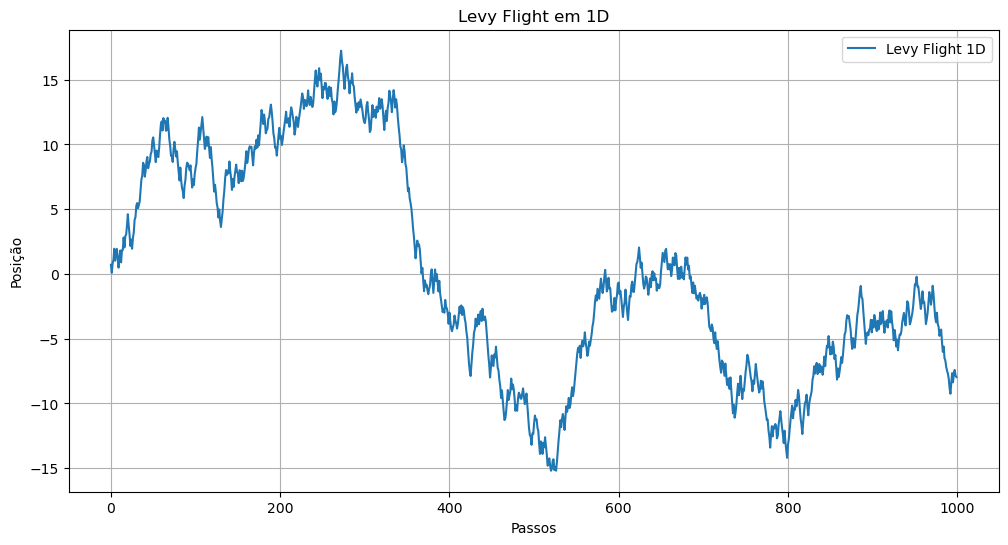

In [3]:
# importando bibliotecas usadas
from scipy.stats import powerlaw

def levy_flight_1d(num_steps, alpha):
    # Geracao de passos de Levy 1D
    step_lengths = powerlaw.rvs(alpha, size=num_steps) # usa distribuicao de potencia para gerar comprimentos
    directions = np.random.choice([-1, 1], size=num_steps) # decide aleatoriamente para frente ou para tras
    steps = step_lengths * directions # mulplitica o tamanho do passo pela direcao
    trajectory = np.cumsum(steps)
    
    return trajectory

# parametros da simulacao
num_passos = 1000
alpha = 1.5

# simulação
trajectory_1d = levy_flight_1d(num_passos, alpha)

# visualizacao
plt.figure(figsize = (12, 6))
plt.plot(trajectory_1d, label='Levy Flight 1D')
plt.title('Levy Flight em 1D')
plt.xlabel('Passos')
plt.ylabel('Posição')
plt.grid(True)
plt.legend()
plt.show()

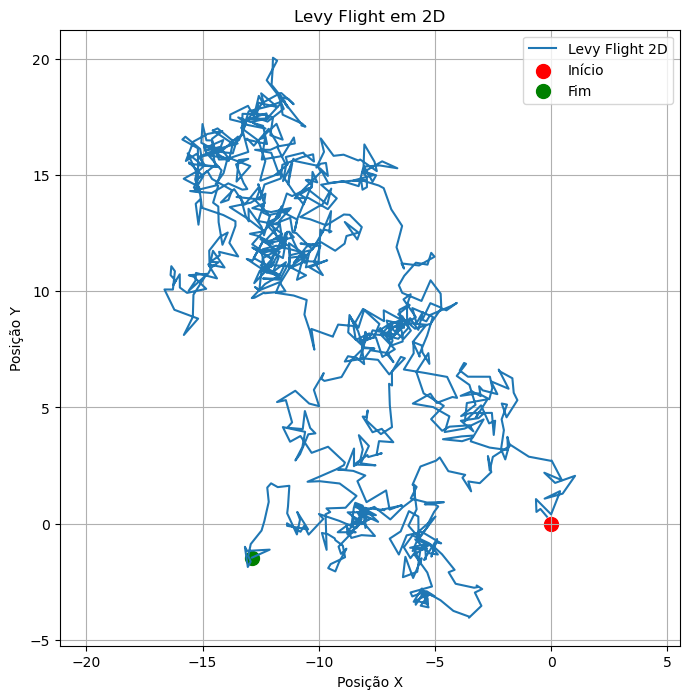

In [4]:
def levy_flight_2d(num_steps, alpha):
    # Geracao de passos de Levy em 2D
    angles = np.random.uniform(0, 2 * np.pi, size=num_steps)
    step_lengths = powerlaw.rvs(alpha, size=num_steps) # usa distribuicao de potencia para gerar comprimentos
    
    delta_x = step_lengths * np.cos(angles)
    delta_y = step_lengths * np.sin(angles)

    trajectory_x = np.cumsum(delta_x)
    trajectory_y = np.cumsum(delta_y)
    
    return trajectory_x, trajectory_y

# parametros da simulacao
num_passos = 1000
alpha = 1.5

# simulacao
trajectory_2d_x, trajectory_2d_y = levy_flight_2d(num_passos, alpha)

# visualizacao
plt.figure(figsize = (8, 8))
plt.plot(trajectory_2d_x, trajectory_2d_y, label='Levy Flight 2D')
plt.scatter(0, 0, color='red', label='Início', s=100)
plt.scatter(trajectory_2d_x[-1], trajectory_2d_y[-1], color='green', label='Fim', s=100)
plt.title('Levy Flight em 2D')
plt.xlabel('Posição X')
plt.ylabel('Posição Y')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()